In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   17G  324G   5% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       365G   21G  345G   6% /opt/bin
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!pip install keras_sequential_ascii
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from keras.models import Sequential
model = Sequential()
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout

  Running setup.py bdist_wheel for keras-sequential-ascii ... - done
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes=10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


print (x_train.shape[1:])#the dimensionalities of the inputs
print(model.summary())

170500096/170498071 [==============================] - 25s 0us/step
(32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
______________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 17s 346us/step - loss: 2.1757 - acc: 0.1677 - val_loss: 2.0106 - val_acc: 0.2254
Epoch 2/200
50000/50000 [==============================] - 12s 241us/step - loss: 1.8884 - acc: 0.2789 - val_loss: 1.8616 - val_acc: 0.3118
Epoch 3/200
50000/50000 [==============================] - 12s 243us/step - loss: 1.7532 - acc: 0.3383 - val_loss: 1.6560 - val_acc: 0.3693
Epoch 4/200
50000/50000 [==============================] - 13s 251us/step - loss: 1.6370 - acc: 0.3912 - val_loss: 1.6969 - val_acc: 0.3858
Epoch 5/200
50000/50000 [==============================] - 12s 243us/step - loss: 1.5370 - acc: 0.4317 - val_loss: 1.5359 - val_acc: 0.4353
Epoch 6/200
50000/50000 [==============================] - 12s 239us/step - loss: 1.4650 - acc: 0.4623 - val_loss: 1.5117 - val_acc: 0.4682
Epoch 7/200
50000/50000 [==============================] - 12s 240us/step - loss: 1.4116 - acc: 0.4849 - val_l

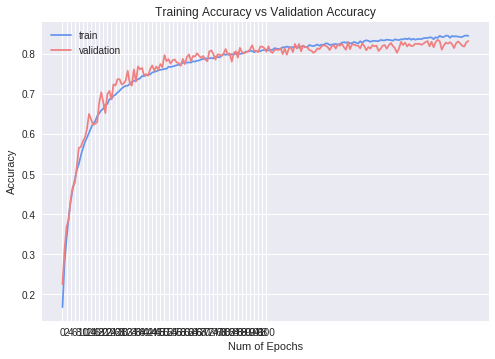

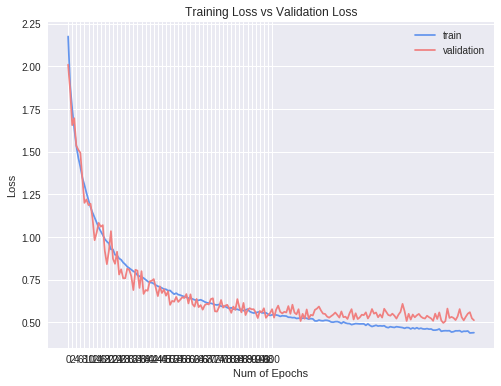

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[819  11  18  19  26   1   6   9  71  20]
 [  7 912   1   4   2   1   6   1  26  40]
 [ 42   2 706  50  83  46  50  10  10   1]
 [ 13   4  39 682  43 117  57  19  16  10]
 [  3   2  21  36 844  21  31  34   8   0]
 [  4   1  11 133  47 760  15  21   7   1]
 [  4   1  20  37  19   9 896   3  10   1]
 [  4   0  13  34  32  33   2 875   4   3]
 [ 14   3   1  11   5   3   4   0 947  12]
 [ 18  46   2   9   3   3   3   9  23 884]]


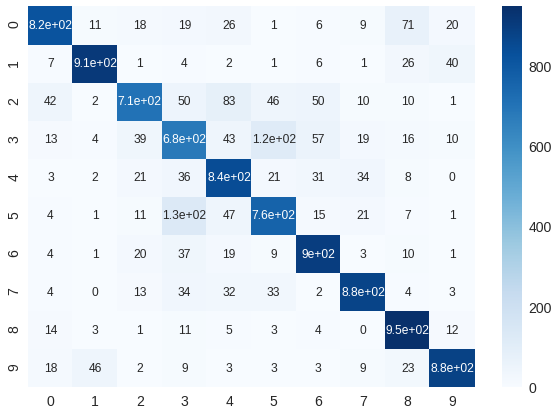

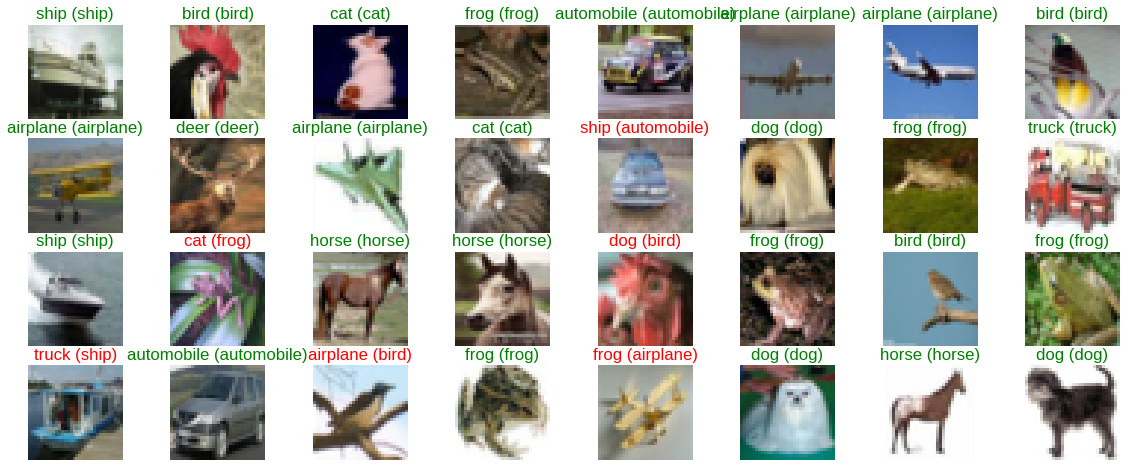

In [0]:
opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size=128
epochs=200

import datetime

# from keras.callbacks import TensorBoard
# tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)




starttime = datetime.datetime.now()

model2 = model.fit(x_train, y_train, batch_size=batch_size, 
                   epochs=epochs, verbose=1, validation_data=(x_test, y_test))

endtime = datetime.datetime.now()
print (endtime - starttime)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


plt.figure(0)
plt.plot(model2.history['acc'],'cornflowerblue')
plt.plot(model2.history['val_acc'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(model2.history['loss'],'cornflowerblue')
plt.plot(model2.history['val_loss'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()


# Confusion matrix result
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size": 12})# font size
plt.show()

# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))